# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [95]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

dfs = []  # List to store data frames for each page

for page_num in range(1, pages + 1):
    page_reviews = []
    page_stats = []

    print(f"Scraping page {page_num}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    review_divs = parsed_content.find_all("div", {"class": "text_content"})
    stats_divs = parsed_content.find_all("div", {"class": "review-stats"})

    for review_div, stats_div in zip(review_divs, stats_divs):
        page_reviews.append(review_div.get_text())

        rating_values = []
        category_values = []

        for rating_td in stats_div.find_all('td', {'class': 'review-value'}):
            rating_values.append(rating_td.get_text())

        recommendation = rating_values[-1]
        rating_values = rating_values[:-1]

        for stars_td in stats_div.find_all('td', {'class': 'review-rating-stars stars'}):
            num_stars = len(stars_td.find_all('span', {'class': 'star fill'}))
            rating_values.append(num_stars)
        rating_values.append(recommendation)

        for header_td in stats_div.find_all('td', {'class': 'review-rating-header'}):
            category_values.append(header_td.get_text())

        stats_data = {category_values[i]: rating_values[i] for i in range(len(category_values))}
        page_stats.append(stats_data)

    # Create a DataFrame for each page with the reviews and stats
    df_page = pd.DataFrame({'Review': page_reviews})
    df_page = df_page.assign(**pd.DataFrame(page_stats))

    # Append the page DataFrame to the list
    dfs.append(df_page)

# Concatenate all the data frames in the list
df = pd.concat(dfs, ignore_index=True)
print("Scraping complete")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping complete


In [96]:
df.sample(10)

,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
970,✅ Trip Verified | Bangkok to London. Seating ...,Business,Economy Class,Bangkok to London,October 2018,3.0,2.0,1.0,2,no,Boieng 777-200,2.0,3.0,NaN
2206,✅ Verified Review | Amsterdam to Hong Kong vi...,Business,Economy Class,AMS to HKG via LHR,April 2016,1.0,2.0,3.0,2,no,A380,1.0,3.0,1.0
2052,✅ Verified Review | London Heathrow to Istanb...,Family Leisure,Economy Class,LHR to IST,August 2016,4.0,5.0,4.0,3,no,NaN,1.0,3.0,NaN
1001,✅ Trip Verified | Budapest to London Heathrow...,Solo Leisure,Economy Class,Budapest to London Heathrow,September 2018,4.0,4.0,5.0,4,yes,A320,NaN,NaN,NaN
2325,British Airways flight from Glasgow to London ...,Couple Leisure,Economy Class,GLA to LHR,January 2016,4.0,5.0,5.0,5,yes,A320,5.0,NaN,NaN
56,✅ Trip Verified | BA overbook every flight to ...,Business,Economy Class,London to Madrid,May 2023,4.0,3.0,1.0,1,no,NaN,1.0,NaN,NaN
549,✅ Trip Verified | Rio De Janeiro to London He...,Solo Leisure,Business Class,Rio De Janeiro to London Heathrow,December 2019,5.0,5.0,4.0,5,yes,Boeing 787-8,5.0,NaN,NaN
668,"✅ Trip Verified | London to Abuja-flight full,...",Business,Economy Class,London Heathrow to Abuja Nigeria,September 2019,3.0,4.0,1.0,2,no,Boeing 777-200,1.0,1.0,NaN
2108,✅ Verified Review | London Heathrow to Atlant...,Solo Leisure,Premium Economy,LHR to ATL,June 2016,3.0,3.0,1.0,2,no,NaN,NaN,1.0,NaN
2156,✅ Verified Review | London to Paris CDG in bu...,Family Leisure,Business Class,LHR to CDG,May 2016,4.0,5.0,2.0,3,yes,A320,4.0,NaN,NaN


In [97]:
df.to_csv("data/BA_reviews.csv", index=False)
df

,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
0,✅ Trip Verified | Customer Service does not e...,Family Leisure,Business Class,London to Rhodes,July 2023,1.0,1.0,1.0,1,no,NaN,NaN,NaN,NaN
1,✅ Trip Verified | Another really great pair of...,Family Leisure,Business Class,Newcastle to Las Vegas via Heathrow,June 2023,4.0,5.0,4.0,4,yes,A320 A350,4.0,3.0,NaN
2,Not Verified | Our A380 developed a fault tax...,Solo Leisure,Business Class,London to Miami,June 2023,1.0,1.0,1.0,1,no,A380,1.0,NaN,NaN
3,Not Verified | Horrible airline. Does not care...,Solo Leisure,Economy Class,Amman to London,July 2023,3.0,1.0,4.0,3,no,A320Neo,1.0,1.0,3.0
4,✅ Trip Verified | My family and I have flown ...,Couple Leisure,Premium Economy,Chennai to London,July 2023,3.0,2.0,4.0,1,no,Boeing 777,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,YYZ to LHR - July 2012 - I flew overnight in p...,NaN,Premium Economy,NaN,NaN,4.0,3.0,NaN,4,yes,NaN,3.0,4.0,NaN
3596,Flew return in CW from LHR to BKK in August 20...,NaN,Business Class,NaN,NaN,4.0,3.0,NaN,3,yes,NaN,2.0,4.0,NaN
3597,Flew LHR - VIE return operated by bmi but BA a...,NaN,Economy Class,NaN,NaN,5.0,5.0,NaN,4,yes,NaN,5.0,0.0,NaN
3598,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,4.0,5.0,NaN,3,yes,NaN,4.0,0.0,NaN


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Task 1.1 - Cleaning the data
---

In [4]:
df = pd.read_csv("data/BA_reviews.csv")

In [5]:
print(df.shape)
df.sample(1)

(3600, 14)


,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
960,✅ Trip Verified | Abu Dhabi to London. Althou...,Solo Leisure,Economy Class,Abu Dhabi to London,October 2018,2.0,1.0,3.0,3,no,A340-300,1.0,1.0,1.0


In [6]:
# Removes verification status if present
def split_review(review):
    if '|' in review:
        review_parts = review.split('|')
        return review_parts[1].strip()
    else:
        return review.strip()
    
df['Review'] = df['Review'].apply(split_review)

df.sample(20)

,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
3179,BA16 Singapore to London. B777 World Traveller...,NaN,Economy Class,NaN,NaN,4.0,5.0,NaN,5,yes,NaN,5.0,4.0,NaN
399,Club Europe on British Airways. Outstanding an...,Couple Leisure,Premium Economy,Madrid to London,October 2021,4.0,5.0,3.0,5,yes,Boeing 787,5.0,4.0,NaN
181,Flew from Amman to London on Nov. 14 2022. Not...,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),November 2022,3.0,2.0,4.0,2,no,NaN,1.0,NaN,NaN
613,London Heathrow to Edinburgh. Boarding efficie...,Solo Leisure,Economy Class,London Heathrow to Edinburgh,October 2019,1.0,3.0,3.0,3,yes,A321neo,1.0,NaN,NaN
1129,Flew London to Budapest with British Airways. ...,Couple Leisure,Economy Class,London to Budapest,April 2018,3.0,3.0,2.0,1,no,NaN,1.0,1.0,1.0
36,My husband and I booked seats within our premi...,Couple Leisure,Premium Economy,Sydney via Singapore to London Heathrow,March 2023,4.0,4.0,5.0,1,no,NaN,1.0,NaN,NaN
2376,London to Johannesburg return with British Air...,Family Leisure,Economy Class,LHR to JNB,December 2015,1.0,4.0,3.0,1,no,NaN,1.0,3.0,NaN
843,London Heathrow to Madrid. I travel from LHR r...,Business,Economy Class,London Heathrow to Madrid,March 2019,5.0,5.0,5.0,5,yes,A320,NaN,NaN,NaN
2537,British Airways from Antigua to Gatwick. A sha...,Business,Economy Class,Antigua to Gatwick,October 2015,1.0,2.0,4.0,2,no,Boeing 777-200,1.0,2.0,NaN
1340,"Gatwick to Faro. Pretty good flight all round,...",Solo Leisure,Business Class,Gatwick to Faro,October 2017,3.0,4.0,4.0,5,yes,A319,4.0,NaN,NaN


In [8]:
# Save new file
df.to_csv("data/BA_reviews_clean.csv", index=False)
df = pd.read_csv("data/BA_reviews_clean.csv")

### 1.2 - Tokenisation of data
Using ntlt, I will be tokenising the reviews, removing stopwords and POS tagging

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katerina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def process_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stopWords = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopWords]
    
    # POS tagging
    tagged = pos_tag(tokens)
    
    return tagged

df['Processed Review'] = df['Review'].apply(process_text)

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

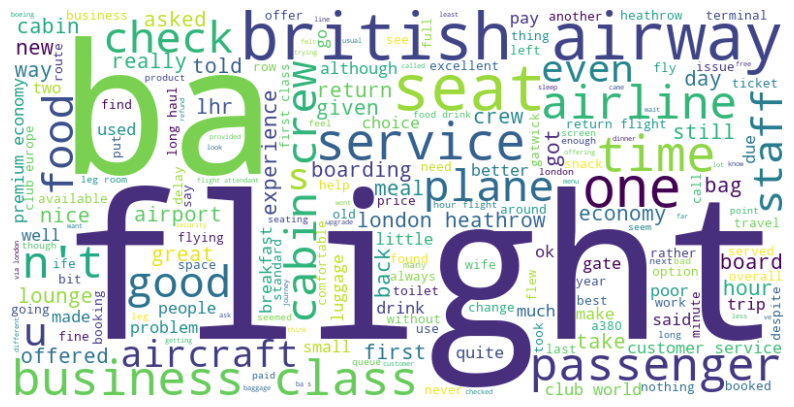

In [16]:
text = ' '.join([word for sublist in df['Processed Review'] for word, _ in sublist])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
